# APS1070 Week 5 Lecture Code


## Part 1 - Linear Algebra 

## Inverting a Matrix

In [ ]:
import numpy as np
from numpy.linalg import inv

In [ ]:
mat = np.array([[1,0,2,0],[1,1,0,0], [1,2,0,1],[1,1,0,1]])
mat

array([[1, 0, 2, 0],
       [1, 1, 0, 0],
       [1, 2, 0, 1],
       [1, 1, 0, 1]])

In [ ]:
mat_inv = inv(mat)
mat_inv

array([[ 0. ,  1. , -1. ,  1. ],
       [ 0. ,  0. ,  1. , -1. ],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0. , -1. ,  0. ,  1. ]])

In [ ]:
mat_inv@mat

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
mat@mat_inv

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Part 2 - Analytical Geometry

NORM

In [ ]:
from numpy import linalg as LA
a = np.array([3,4])
a

array([3, 4])

In [ ]:
LA.norm(a)

5.0

INNER PRODUCT OF VECTORS

In [ ]:
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x,y)

[1 2 3] [4 5 6]


In [ ]:
x.T @ y

32

In [ ]:
np.matmul(x.T,y)

32

In [ ]:
np.dot(x,y)

32

In [ ]:
np.inner(x,y)

32

INNER PRODUCT OF MATRICES (Frobenius inner product)

In [ ]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[4,5,6],[0,0,0]])
print(x)
print(y)

[[1 2 3]
 [4 5 6]]
[[4 5 6]
 [0 0 0]]


In [ ]:
np.sum((np.multiply(x,y)))

32

Lengths and distances

In [ ]:
x = np.array([1,0,1])
y = np.array([0,1,1])
print(x,y)

[1 0 1] [0 1 1]


In [ ]:
np.linalg.norm(x-y)

1.4142135623730951

Angles and orthogonality

In [ ]:
x = np.array([1,1])
y = np.array([1,2])
print(x,y)

[1 1] [1 2]


In [ ]:
np.degrees(np.arccos(np.dot(x,y)/(np.dot(x,x)*np.dot(y,y))**0.5))

18.434948822922017

## Part 3 - Data Augmentation
Many of the transformation techniques covered in lecture can be implemented on on image data to improve the performance of our machine learning algorithms. Provided is a demonstration of some of the common transformations used for data augmentation.

Load Sample Image

In [ ]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import transform
from skimage.transform import rotate, AffineTransform, resize
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage


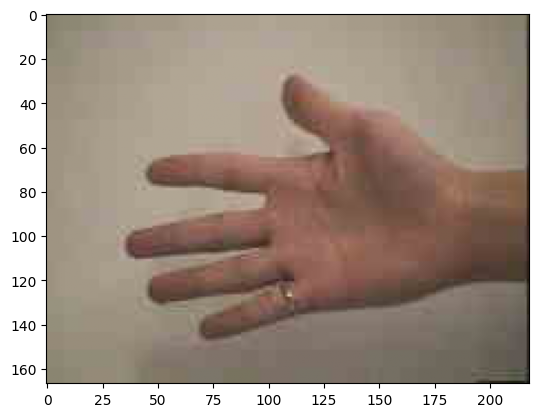

In [ ]:
# load Image
img = imread('https://saref.github.io/teaching/APS1070/hand.jpg') / 255

# plot original Image
plt.imshow(img)
plt.show()

Rotations

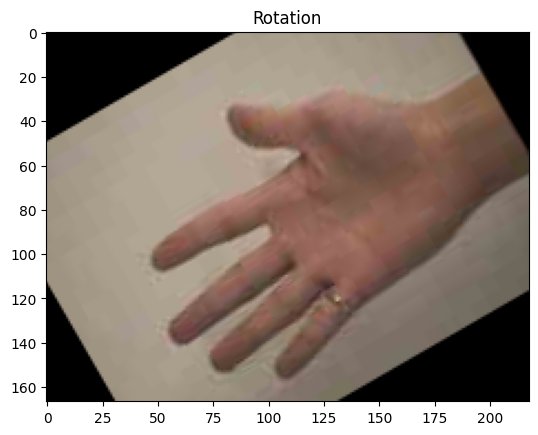

In [ ]:
# image rotation using skimage.transformation.rotate
image_rot = rotate(img, angle=30)

plt.title('Rotation')
plt.imshow(image_rot)
plt.show()



Shear

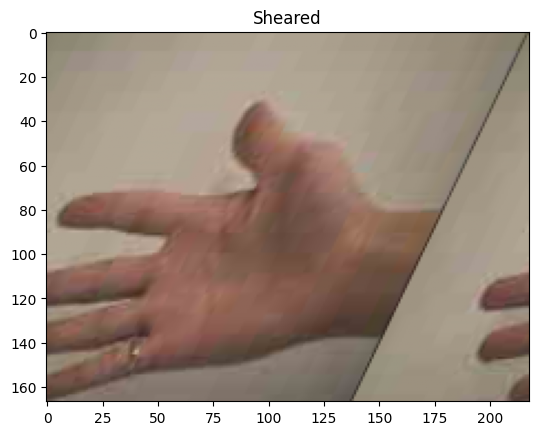

In [ ]:
# image shearing using sklearn.transform.AffineTransform
tf = AffineTransform(shear=-0.5)

sheared = transform.warp(img, tf, order=1, preserve_range=True, mode='wrap')
plt.title('Sheared')
plt.imshow(sheared)
plt.show()

Scaling

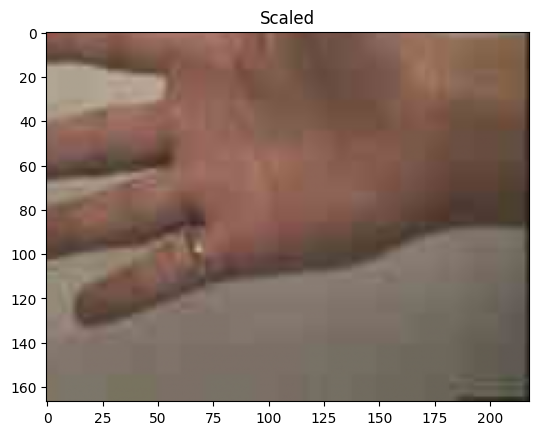

Original Shape:  (167, 218, 3)
Rescaled Shape:  (167, 218, 3)


In [ ]:
# Image rescaling with sklearn.transform.resize
rows = img.shape[0]
cols = img.shape[1]
scaled = resize(img[70:170,60:260,:], (rows, cols))

plt.title('Scaled')
plt.imshow(scaled)
plt.show()

print('Original Shape: ',img.shape)
print('Rescaled Shape: ',scaled.shape)


Flipping or Reflection

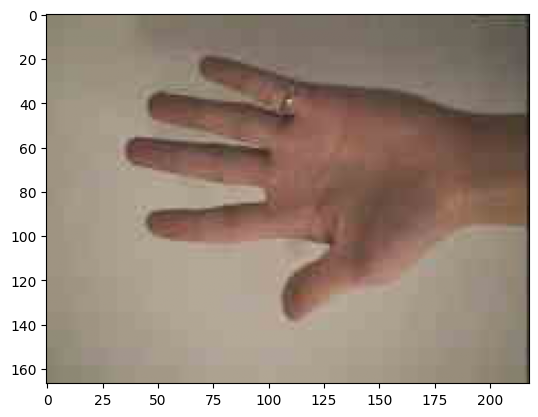

In [ ]:
# flip up-down using np.flipud
up_down = np.flipud(img)

plt.imshow(up_down)
plt.show()

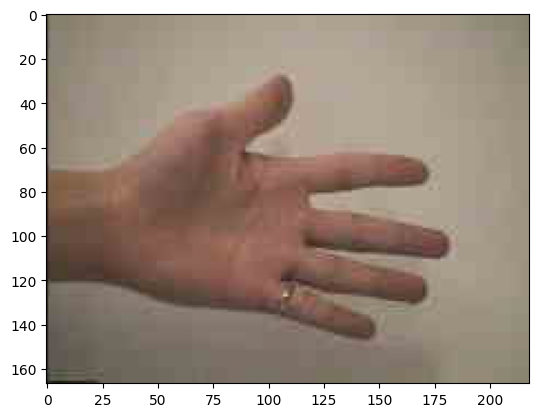

In [ ]:
# flip left-right using np.fliplr
left_right = np.fliplr(img)

plt.imshow(left_right)
plt.show()

Add Noise

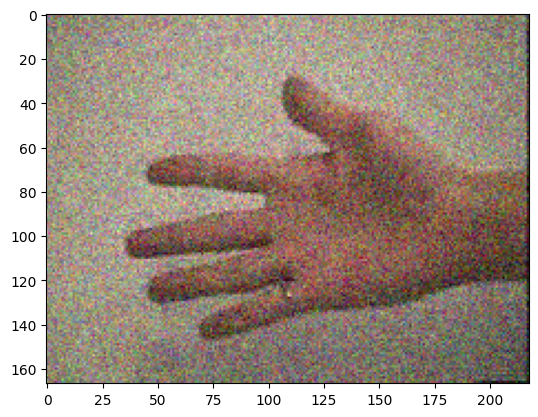

In [ ]:
# Apply Random Noise to image using skimage.utils.random_noise
noised = random_noise(img, var=0.1**2)

plt.imshow(noised)
plt.show()

Increase Brightness

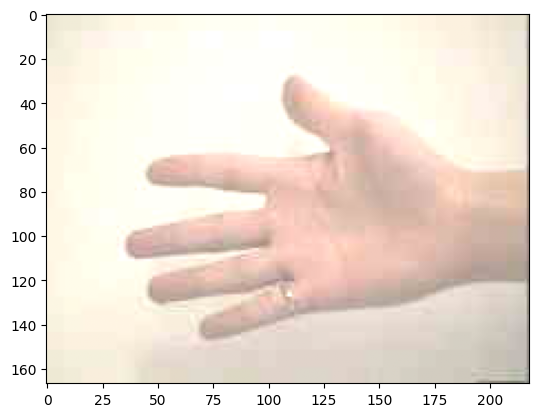

In [ ]:
# Increasing the brighness of the Image
# Note: Here we add 100/255 since we scaled Intensity values of Image when loading (by dividing it 255)

highB = img + (100/255)

plt.imshow(highB)
plt.show()

Increase Contrast

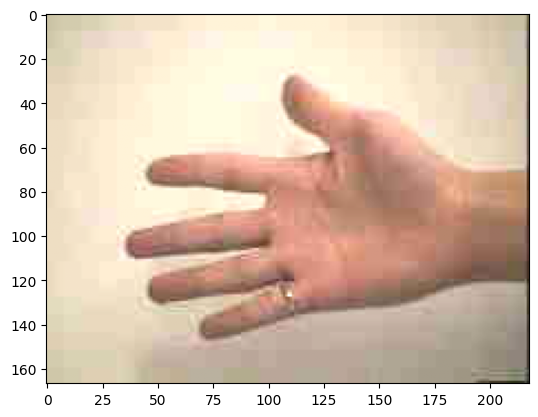

In [ ]:
# Increasing the contrast of the Image
highC = img * 1.5

plt.imshow(highC)
plt.show()

In [ ]:
# Enhancing contrast with skimage image adjustement functions

img.min(), img.max()

(0.058823529411764705, 0.8549019607843137)

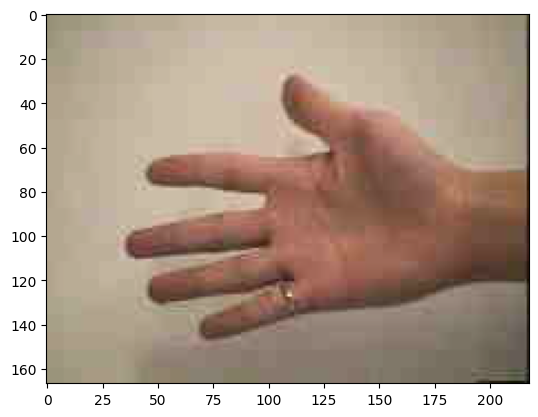

In [ ]:
from skimage import exposure

betterC = exposure.rescale_intensity(img)

plt.imshow(betterC)
plt.show()

From a single image we were able to generate many different images which we could use to augment our training data.

<function matplotlib.pyplot.show(close=None, block=None)>

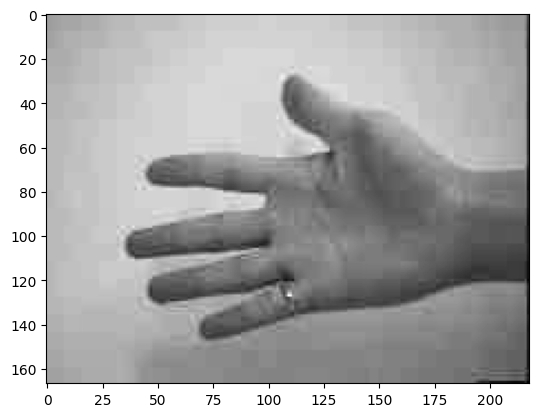

In [ ]:
# Greyscale images (reducing 3 channels to 1)

from skimage.color import rgb2gray

greyImg = rgb2gray(img)

plt.imshow(greyImg,cmap=plt.cm.gray)
plt.show

## Part 2 - Projections

Projection onto a line can be thought of as a projection onto a 1-d subspace.

In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Let's create a column vector and plot it in the 3 dimensional space

b = np.array([[1, 2, 2]]).T
b

array([[1],
       [2],
       [2]])

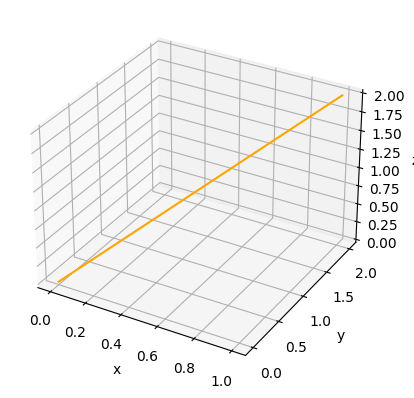

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# We use the x dimension as the baseline
# This line of code creates five linearly distanced points in the range of 0 to 1
b_x = np.linspace(0, 1 ,5)

# We measure the y and z coordiantes of the vector according to its x coordinate
b_y = b[1]/b[0]*b_x
b_z = b[2]/b[0]*b_x

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Create arbitrary point x (can be the endpoint of a vector)

In [ ]:
x = np.array([[1, 1, 1]]).T
x

array([[1],
       [1],
       [1]])

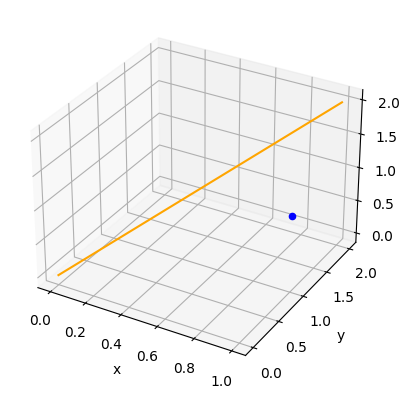

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x_x = x[0]
x_y = x[1]
x_z = x[2]

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.scatter3D(x_x, x_y, x_z, color="b");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Prepare projection matrix

$P_\pi = \frac{bb^T}{b^Tb}$

In [ ]:
P = b@b.T/(b.T@b)
P

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])

Project point x onto the line

In [ ]:
Px = P@x

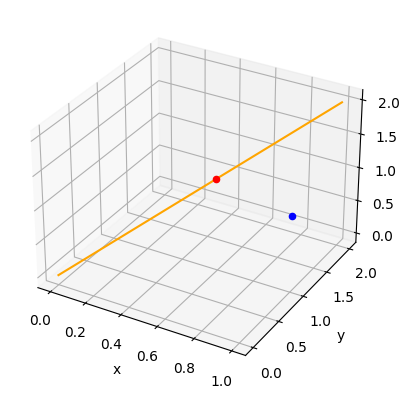

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Px_x = Px[0]
Px_y = Px[1]
Px_z = Px[2]

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.scatter3D(x_x, x_y, x_z, color="b");
ax.scatter3D(Px_x, Px_y, Px_z, color="r");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

What about projecting other points?

In [ ]:
#create a second point "h"
h = np.array([[1, 0.5, 0.5]]).T
h

array([[1. ],
       [0.5],
       [0.5]])

Project h onto the line

In [ ]:
Ph = P@h
Ph

array([[0.33333333],
       [0.66666667],
       [0.66666667]])

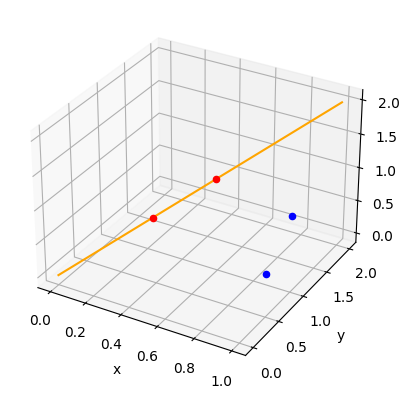

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

h_x = h[0]
h_y = h[1]
h_z = h[2]

Ph_x = Ph[0]
Ph_y = Ph[1]
Ph_z = Ph[2]

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.scatter3D(x_x, x_y, x_z, color="b");
ax.scatter3D(Px_x, Px_y, Px_z, color="r");
ax.scatter3D(h_x, h_y, h_z, color="b");
ax.scatter3D(Ph_x, Ph_y, Ph_z, color="r");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

What about a point already in the span of $b$?

In [ ]:
# create point "i" that is on the line
i = np.array([[0.1, 0.2, 0.2]]).T
i

array([[0.1],
       [0.2],
       [0.2]])

Project i onto the line...

In [ ]:
# The projection of the point i is itself
Pi = P@i
Pi

array([[0.1],
       [0.2],
       [0.2]])

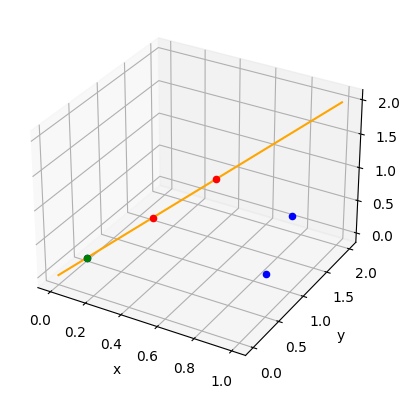

In [ ]:
# We plot the projection of point i in green

fig = plt.figure()
ax = plt.axes(projection='3d')

i_x = i[0]
i_y = i[1]
i_z = i[2]

Pi_x = Pi[0]
Pi_y = Pi[1]
Pi_z = Pi[2]

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.scatter3D(x_x, x_y, x_z, color="b");
ax.scatter3D(Px_x, Px_y, Px_z, color="r");
ax.scatter3D(h_x, h_y, h_z, color="b");
ax.scatter3D(Ph_x, Ph_y, Ph_z, color="r");
ax.scatter3D(i_x, i_y, i_z, color="b");
ax.scatter3D(Pi_x, Pi_y, Pi_z, color="g");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


Similarly, projecting the projection matrix onto itself results in P = PP

In [ ]:
P

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])

In [ ]:
P@P

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])